In [1]:
### Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/Research Analysis/final_new.csv")
df.head()

,Unnamed: 0,X,Hospital,Main.Unit,Age,Gender,Ethnicity,Highest.Educational.Level,Marital.Status,Have.Children.,...,P.25,P.26,P.27,P.28,P.29,P.30,BMI,CS_Score,BO_Score,STS_Score
0,1,1,DMH,Inward Care,29,Female,Sinhala,Diploma in Nursing,Married,Yes,...,3,2,5,2,4,4,17.777778,42,35,29
1,2,2,DMH,Inward Care,25,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,...,4,3,4,3,5,4,25.299376,48,42,40
2,3,3,DMH,Inward Care,28,Female,Sinhala,BSc. Nursing,Married,No,...,3,3,4,4,4,4,22.313278,32,33,35
3,4,4,DMH,Inward Care,43,Female,Sinhala,BSc. (Hons) in Nursing,Married,Yes,...,3,4,4,3,5,5,25.631168,48,39,33
4,5,5,DMH,Inward Care,28,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,...,3,5,2,3,4,4,22.666667,42,44,37


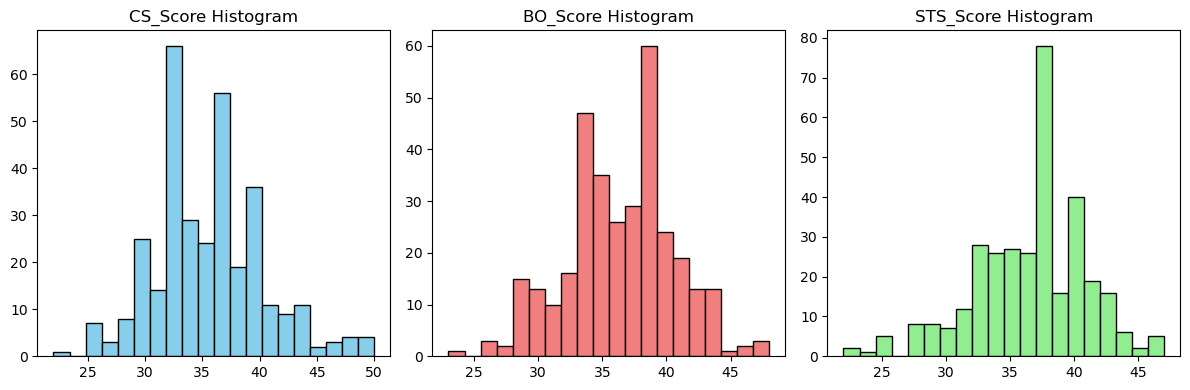

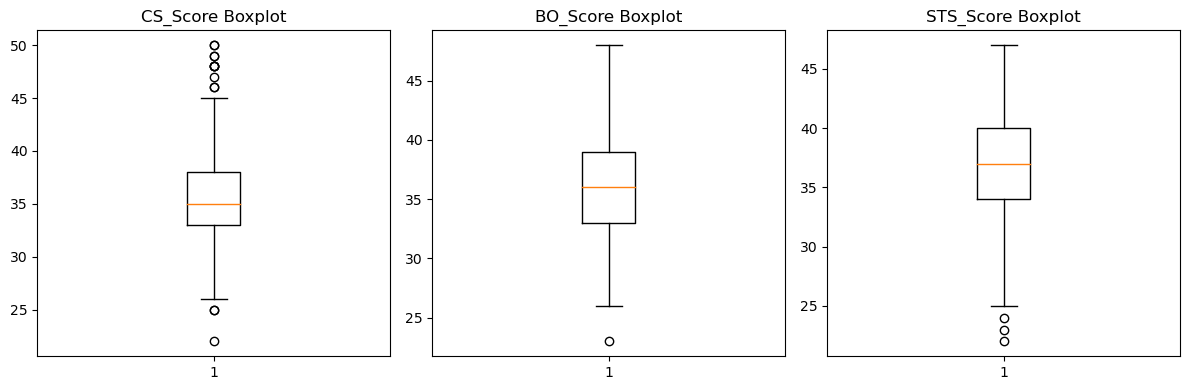

In [4]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['CS_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('CS_Score Histogram')

plt.subplot(1, 3, 2)
plt.hist(df['BO_Score'], bins=20, color='lightcoral', edgecolor='black')
plt.title('BO_Score Histogram')

plt.subplot(1, 3, 3)
plt.hist(df['STS_Score'], bins=20, color='lightgreen', edgecolor='black')
plt.title('STS_Score Histogram')

plt.tight_layout()
plt.show()

# Create boxplots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.boxplot(df['CS_Score'])
plt.title('CS_Score Boxplot')

plt.subplot(1, 3, 2)
plt.boxplot(df['BO_Score'])
plt.title('BO_Score Boxplot')

plt.subplot(1, 3, 3)
plt.boxplot(df['STS_Score'])
plt.title('STS_Score Boxplot')

plt.tight_layout()
plt.show()

## Normality tests for three variables

## Shapiro Wilk Test

In [3]:
import scipy.stats as stats

# Perform Shapiro-Wilk test for normality
cs_shapiro_stat, cs_shapiro_pvalue = stats.shapiro(df['CS_Score'])
bo_shapiro_stat, bo_shapiro_pvalue = stats.shapiro(df['BO_Score'])
sts_shapiro_stat, sts_shapiro_pvalue = stats.shapiro(df['STS_Score'])

# Set a significance level
alpha = 0.05

# Check the results
if cs_shapiro_pvalue > alpha:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if bo_shapiro_pvalue > alpha:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if sts_shapiro_pvalue > alpha:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")


CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is normally distributed (fail to reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)


## Anderson Darling Test

In [5]:
import scipy.stats as stats

# Perform Anderson-Darling test for normality
cs_anderson_stat, cs_anderson_critical_values, cs_anderson_significance_levels = stats.anderson(df['CS_Score'])
bo_anderson_stat, bo_anderson_critical_values, bo_anderson_significance_levels = stats.anderson(df['BO_Score'])
sts_anderson_stat, sts_anderson_critical_values, sts_anderson_significance_levels = stats.anderson(df['STS_Score'])

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check the results
if cs_anderson_stat < cs_anderson_critical_values[2]:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if bo_anderson_stat < bo_anderson_critical_values[2]:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if sts_anderson_stat < sts_anderson_critical_values[2]:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")

CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is not normally distributed (reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)


## Kolmogorov Smirnov Test

CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is not normally distributed (reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)


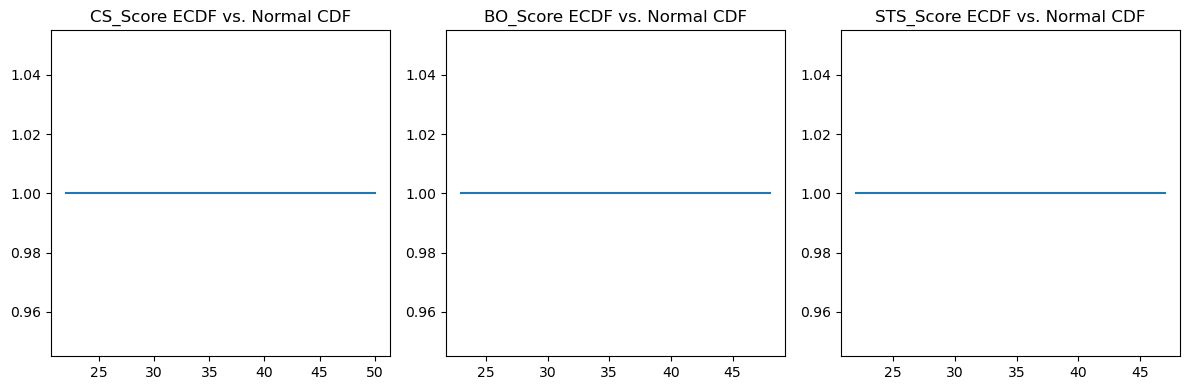

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Perform Kolmogorov-Smirnov test for normality
ks_stat_cs, ks_pvalue_cs = stats.kstest(df['CS_Score'], 'norm')
ks_stat_bo, ks_pvalue_bo = stats.kstest(df['BO_Score'], 'norm')
ks_stat_sts, ks_pvalue_sts = stats.kstest(df['STS_Score'], 'norm')

alpha = 0.05

# Check the results
if ks_pvalue_cs > alpha:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if ks_pvalue_bo > alpha:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if ks_pvalue_sts > alpha:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")

# Plot empirical cumulative distribution functions (ECDFs) for visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(sorted(df['CS_Score']), stats.norm.cdf(sorted(df['CS_Score'])), label='Empirical')
plt.title('CS_Score ECDF vs. Normal CDF')

plt.subplot(1, 3, 2)
plt.plot(sorted(df['BO_Score']), stats.norm.cdf(sorted(df['BO_Score'])), label='Empirical')
plt.title('BO_Score ECDF vs. Normal CDF')

plt.subplot(1, 3, 3)
plt.plot(sorted(df['STS_Score']), stats.norm.cdf(sorted(df['STS_Score'])), label='Empirical')
plt.title('STS_Score ECDF vs. Normal CDF')

plt.tight_layout()
plt.show()

## Lilliefors Test

In [10]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is not normally distributed (reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)


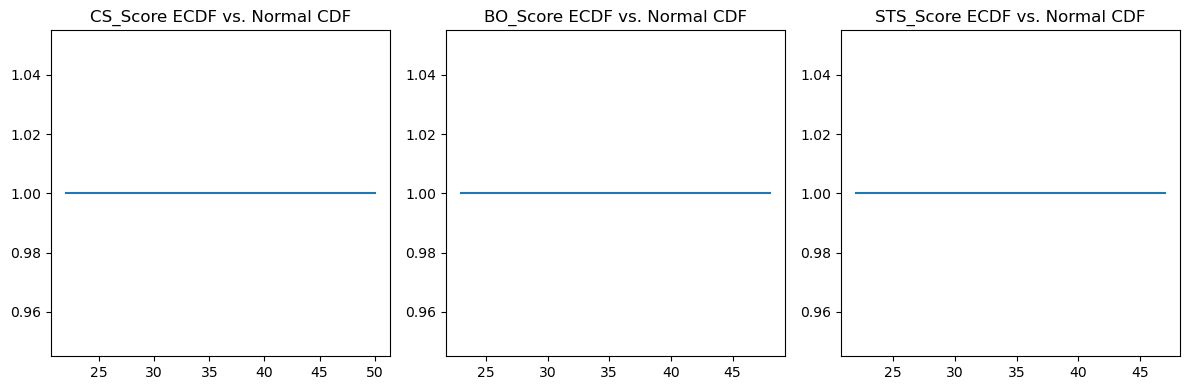

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df with columns CS_Score, BO_Score, STS_Score

# Perform Lilliefors test for normality
lilliefors_stat_cs, lilliefors_pvalue_cs = sm.stats.lilliefors(df['CS_Score'])
lilliefors_stat_bo, lilliefors_pvalue_bo = sm.stats.lilliefors(df['BO_Score'])
lilliefors_stat_sts, lilliefors_pvalue_sts = sm.stats.lilliefors(df['STS_Score'])

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check the results
if lilliefors_pvalue_cs > alpha:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if lilliefors_pvalue_bo > alpha:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if lilliefors_pvalue_sts > alpha:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")

# Plot empirical cumulative distribution functions (ECDFs) for visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(sorted(df['CS_Score']), stats.norm.cdf(sorted(df['CS_Score'])), label='Empirical')
plt.title('CS_Score ECDF vs. Normal CDF')

plt.subplot(1, 3, 2)
plt.plot(sorted(df['BO_Score']), stats.norm.cdf(sorted(df['BO_Score'])), label='Empirical')
plt.title('BO_Score ECDF vs. Normal CDF')

plt.subplot(1, 3, 3)
plt.plot(sorted(df['STS_Score']), stats.norm.cdf(sorted(df['STS_Score'])), label='Empirical')
plt.title('STS_Score ECDF vs. Normal CDF')

plt.tight_layout()
plt.show()

CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is normally distributed (fail to reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)


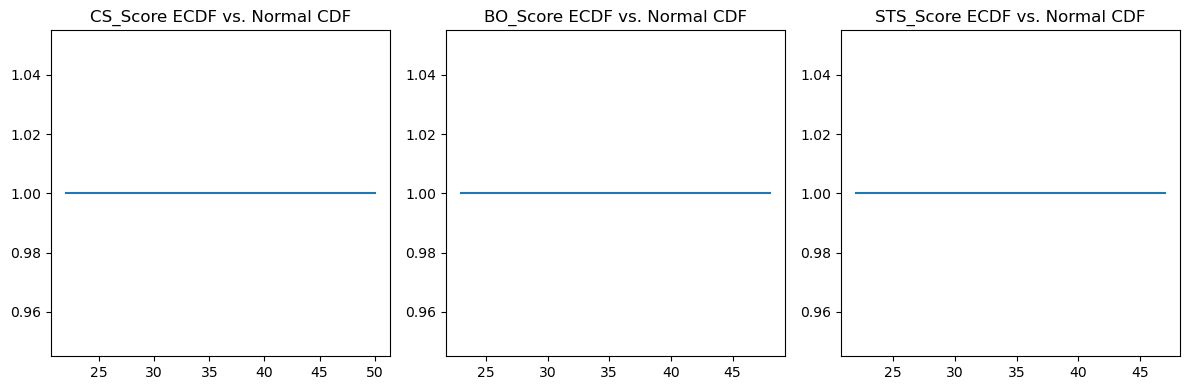

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Perform D'Agostino's K-squared test for normality
k2_stat_cs, k2_pvalue_cs = stats.normaltest(df['CS_Score'])
k2_stat_bo, k2_pvalue_bo = stats.normaltest(df['BO_Score'])
k2_stat_sts, k2_pvalue_sts = stats.normaltest(df['STS_Score'])

alpha = 0.05

# Check the results
if k2_pvalue_cs > alpha:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if k2_pvalue_bo > alpha:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if k2_pvalue_sts > alpha:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")

# Plot empirical cumulative distribution functions (ECDFs) for visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(sorted(df['CS_Score']), stats.norm.cdf(sorted(df['CS_Score'])), label='Empirical')
plt.title('CS_Score ECDF vs. Normal CDF')

plt.subplot(1, 3, 2)
plt.plot(sorted(df['BO_Score']), stats.norm.cdf(sorted(df['BO_Score'])), label='Empirical')
plt.title('BO_Score ECDF vs. Normal CDF')

plt.subplot(1, 3, 3)
plt.plot(sorted(df['STS_Score']), stats.norm.cdf(sorted(df['STS_Score'])), label='Empirical')
plt.title('STS_Score ECDF vs. Normal CDF')

plt.tight_layout()
plt.show()

## Potential outliers

Potential Outliers using Z-score method:
CS_Score: 14    50
15    50
Name: CS_Score, dtype: int64
BO_Score: 296    23
Name: BO_Score, dtype: int64
STS_Score: 31    22
35    23
Name: STS_Score, dtype: int64

Potential Outliers using IQR method:
CS_Score: 1      48
3      48
9      49
14     50
15     50
18     48
26     48
27     49
31     47
130    22
170    46
171    46
296    25
328    25
Name: CS_Score, dtype: int64
BO_Score: 296    23
Name: BO_Score, dtype: int64
STS_Score: 14    24
31    22
35    23
Name: STS_Score, dtype: int64


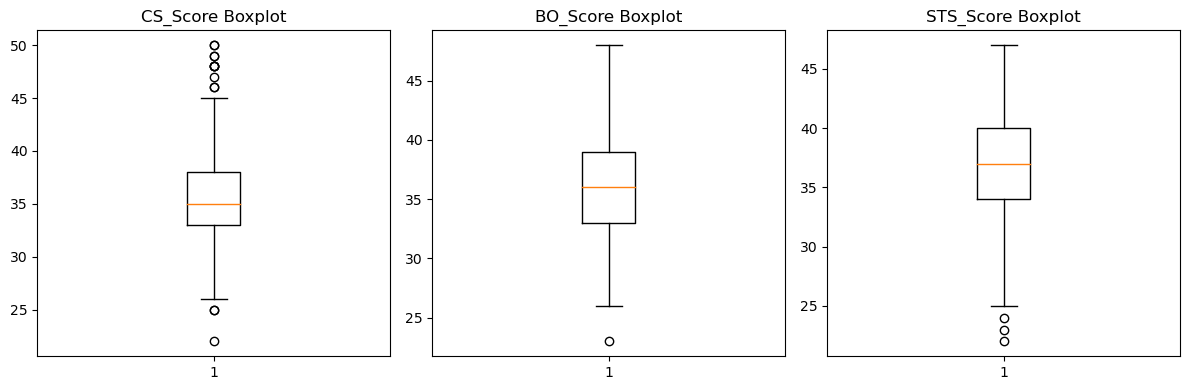

In [13]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = stats.zscore(data)
    return data[(z_scores > threshold) | (z_scores < -threshold)]

# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

# Set threshold for Z-score method (adjust as needed)
zscore_threshold = 3

# Detect outliers for each variable
outliers_cs = detect_outliers_zscore(df['CS_Score'], zscore_threshold)
outliers_bo = detect_outliers_zscore(df['BO_Score'], zscore_threshold)
outliers_sts = detect_outliers_zscore(df['STS_Score'], zscore_threshold)

# Detect outliers using IQR method
outliers_iqr_cs = detect_outliers_iqr(df['CS_Score'])
outliers_iqr_bo = detect_outliers_iqr(df['BO_Score'])
outliers_iqr_sts = detect_outliers_iqr(df['STS_Score'])

# Display results
print("Potential Outliers using Z-score method:")
print("CS_Score:", outliers_cs)
print("BO_Score:", outliers_bo)
print("STS_Score:", outliers_sts)

print("\nPotential Outliers using IQR method:")
print("CS_Score:", outliers_iqr_cs)
print("BO_Score:", outliers_iqr_bo)
print("STS_Score:", outliers_iqr_sts)

# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot(df['CS_Score'])
plt.title('CS_Score Boxplot')

plt.subplot(1, 3, 2)
plt.boxplot(df['BO_Score'])
plt.title('BO_Score Boxplot')

plt.subplot(1, 3, 3)
plt.boxplot(df['STS_Score'])
plt.title('STS_Score Boxplot')

plt.tight_layout()
plt.show()

## transform the data and check the normality

Normality Test after Logarithmic Transformation:
Transformed CS_Score is not normally distributed (reject the null hypothesis)
Transformed BO_Score is not normally distributed (reject the null hypothesis)
Transformed STS_Score is not normally distributed (reject the null hypothesis)


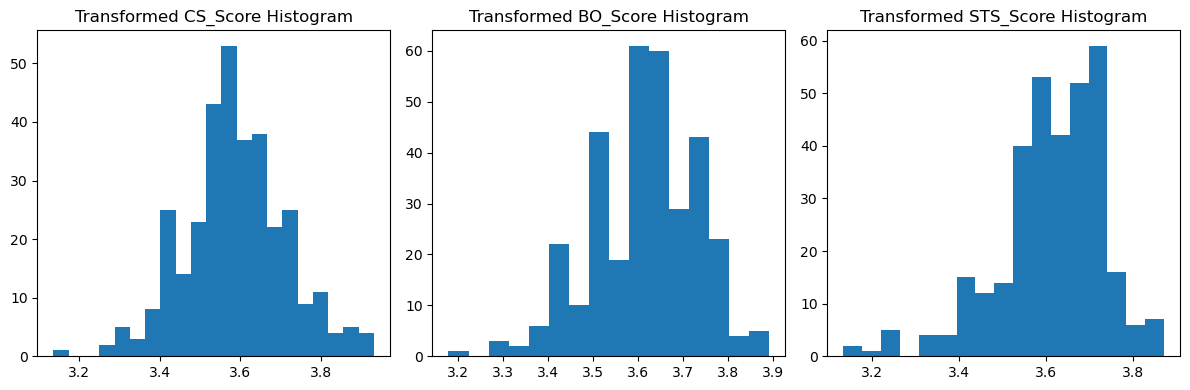

In [21]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df with columns CS_Score, BO_Score, STS_Score

# Function to transform data using logarithmic transformation
def log_transform(data):
    return np.log1p(data)  # Using np.log1p to handle zero values

# Apply logarithmic transformation to each variable
transformed_cs = log_transform(df['CS_Score'])
transformed_bo = log_transform(df['BO_Score'])
transformed_sts = log_transform(df['STS_Score'])

# Check normality of transformed data
shapiro_stat_cs, shapiro_pvalue_cs = stats.shapiro(transformed_cs)
shapiro_stat_bo, shapiro_pvalue_bo = stats.shapiro(transformed_bo)
shapiro_stat_sts, shapiro_pvalue_sts = stats.shapiro(transformed_sts)

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check the results
print("Normality Test after Logarithmic Transformation:")
if shapiro_pvalue_cs > alpha:
    print("Transformed CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("Transformed CS_Score is not normally distributed (reject the null hypothesis)")

if shapiro_pvalue_bo > alpha:
    print("Transformed BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("Transformed BO_Score is not normally distributed (reject the null hypothesis)")

if shapiro_pvalue_sts > alpha:
    print("Transformed STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("Transformed STS_Score is not normally distributed (reject the null hypothesis)")

# Plot histograms for transformed data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(transformed_cs, bins='auto')
plt.title('Transformed CS_Score Histogram')

plt.subplot(1, 3, 2)
plt.hist(transformed_bo, bins='auto')
plt.title('Transformed BO_Score Histogram')

plt.subplot(1, 3, 3)
plt.hist(transformed_sts, bins='auto')
plt.title('Transformed STS_Score Histogram')

plt.tight_layout()
plt.show()

Normality Test after Box-Cox Transformation:
Transformed CS_Score is not normally distributed (reject the null hypothesis)
Transformed BO_Score is normally distributed (fail to reject the null hypothesis)
Transformed STS_Score is not normally distributed (reject the null hypothesis)


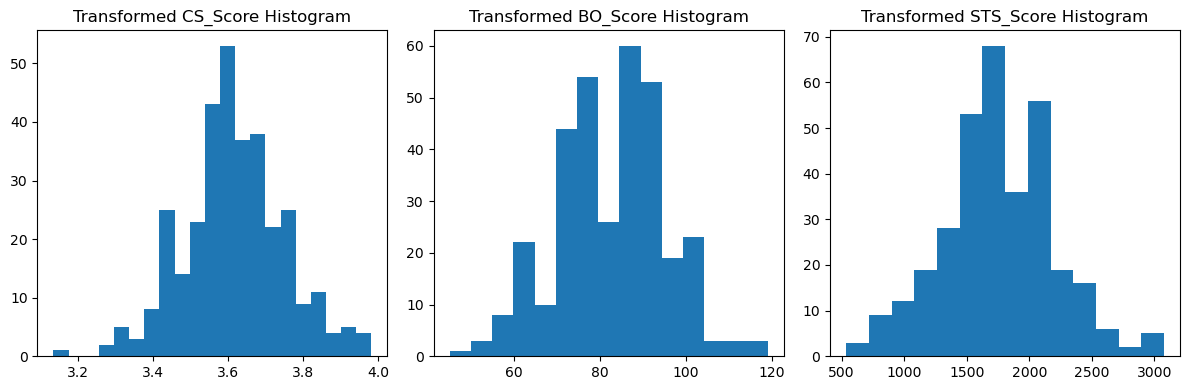

In [23]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df with columns CS_Score, BO_Score, STS_Score

# Function to transform data using Box-Cox transformation
def boxcox_transform(data):
    transformed_data, lambda_value = stats.boxcox(data)
    return transformed_data, lambda_value

# Apply Box-Cox transformation to each variable
transformed_cs, lambda_cs = boxcox_transform(df['CS_Score'])
transformed_bo, lambda_bo = boxcox_transform(df['BO_Score'])
transformed_sts, lambda_sts = boxcox_transform(df['STS_Score'])

# Check normality of transformed data
shapiro_stat_cs, shapiro_pvalue_cs = stats.shapiro(transformed_cs)
shapiro_stat_bo, shapiro_pvalue_bo = stats.shapiro(transformed_bo)
shapiro_stat_sts, shapiro_pvalue_sts = stats.shapiro(transformed_sts)

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check the results
print("Normality Test after Box-Cox Transformation:")
if shapiro_pvalue_cs > alpha:
    print("Transformed CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("Transformed CS_Score is not normally distributed (reject the null hypothesis)")

if shapiro_pvalue_bo > alpha:
    print("Transformed BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("Transformed BO_Score is not normally distributed (reject the null hypothesis)")

if shapiro_pvalue_sts > alpha:
    print("Transformed STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("Transformed STS_Score is not normally distributed (reject the null hypothesis)")

# Plot histograms for transformed data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(transformed_cs, bins='auto')
plt.title('Transformed CS_Score Histogram')

plt.subplot(1, 3, 2)
plt.hist(transformed_bo, bins='auto')
plt.title('Transformed BO_Score Histogram')

plt.subplot(1, 3, 3)
plt.hist(transformed_sts, bins='auto')
plt.title('Transformed STS_Score Histogram')

plt.tight_layout()
plt.show()

## Remove outliers and check the normality

Normality Test after Removing Outliers using IQR method:
CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is not normally distributed (reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)


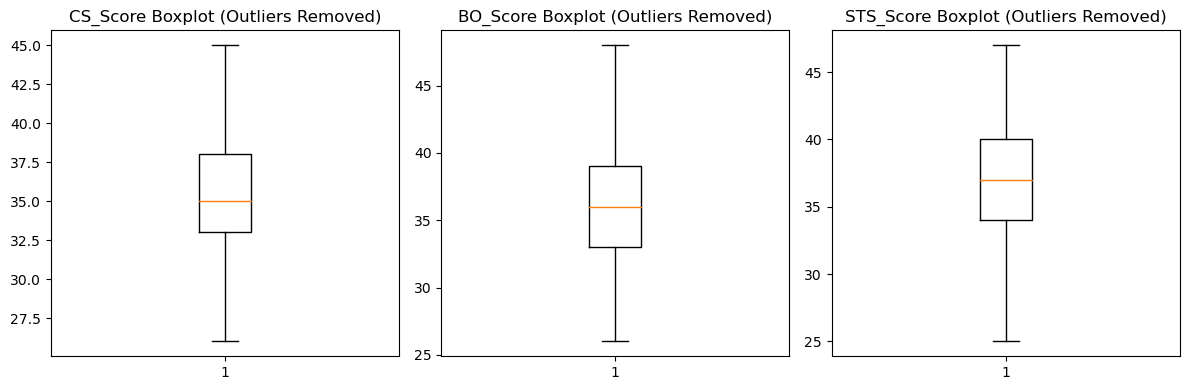

In [14]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Function to remove outliers using IQR method
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]

# Remove outliers for each variable using IQR method
cleaned_cs = remove_outliers_iqr(df['CS_Score'])
cleaned_bo = remove_outliers_iqr(df['BO_Score'])
cleaned_sts = remove_outliers_iqr(df['STS_Score'])

# Perform normality test on cleaned data
shapiro_stat_cs, shapiro_pvalue_cs = stats.shapiro(cleaned_cs)
shapiro_stat_bo, shapiro_pvalue_bo = stats.shapiro(cleaned_bo)
shapiro_stat_sts, shapiro_pvalue_sts = stats.shapiro(cleaned_sts)

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check the results
print("Normality Test after Removing Outliers using IQR method:")
if shapiro_pvalue_cs > alpha:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if shapiro_pvalue_bo > alpha:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if shapiro_pvalue_sts > alpha:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")

# Plot boxplots for cleaned data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot(cleaned_cs)
plt.title('CS_Score Boxplot (Outliers Removed)')

plt.subplot(1, 3, 2)
plt.boxplot(cleaned_bo)
plt.title('BO_Score Boxplot (Outliers Removed)')

plt.subplot(1, 3, 3)
plt.boxplot(cleaned_sts)
plt.title('STS_Score Boxplot (Outliers Removed)')

plt.tight_layout()
plt.show()

In [20]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Function to remove outliers using IQR method
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]

# Remove outliers for each variable using IQR method
cleaned_cs = remove_outliers_iqr(df['CS_Score'])
cleaned_bo = remove_outliers_iqr(df['BO_Score'])
cleaned_sts = remove_outliers_iqr(df['STS_Score'])

# Perform alternative normality test (Anderson-Darling) on cleaned data
anderson_stat_cs = stats.anderson(cleaned_cs)
anderson_stat_bo = stats.anderson(cleaned_bo)
anderson_stat_sts = stats.anderson(cleaned_sts)

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check the results
print("Alternative Normality Test (Anderson-Darling) after Removing Outliers using IQR method:")
if anderson_stat_cs.statistic < anderson_stat_cs.critical_values[2]:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if anderson_stat_bo.statistic < anderson_stat_bo.critical_values[2]:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if anderson_stat_sts.statistic < anderson_stat_sts.critical_values[2]:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")

Alternative Normality Test (Anderson-Darling) after Removing Outliers using IQR method:
CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is not normally distributed (reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)


In [19]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Function to remove outliers using IQR method
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]

# Remove outliers for each variable using IQR method
cleaned_cs = remove_outliers_iqr(df['CS_Score'])
cleaned_bo = remove_outliers_iqr(df['BO_Score'])
cleaned_sts = remove_outliers_iqr(df['STS_Score'])

# Perform alternative normality test (Kolmogorov-Smirnov) on cleaned data
ks_stat_cs, ks_pvalue_cs = stats.kstest(cleaned_cs, 'norm')
ks_stat_bo, ks_pvalue_bo = stats.kstest(cleaned_bo, 'norm')
ks_stat_sts, ks_pvalue_sts = stats.kstest(cleaned_sts, 'norm')

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check the results
print("Alternative Normality Test (Kolmogorov-Smirnov) after Removing Outliers using IQR method:")
if ks_pvalue_cs > alpha:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if ks_pvalue_bo > alpha:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if ks_pvalue_sts > alpha:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")

Alternative Normality Test (Kolmogorov-Smirnov) after Removing Outliers using IQR method:
CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is not normally distributed (reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)


In [18]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df with columns CS_Score, BO_Score, STS_Score

# Function to remove outliers using IQR method
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]

# Remove outliers for each variable using IQR method
cleaned_cs = remove_outliers_iqr(df['CS_Score'])
cleaned_bo = remove_outliers_iqr(df['BO_Score'])
cleaned_sts = remove_outliers_iqr(df['STS_Score'])

# Perform alternative normality test (Lilliefors) on cleaned data
lilliefors_stat_cs, lilliefors_pvalue_cs = sm.stats.lilliefors(cleaned_cs)
lilliefors_stat_bo, lilliefors_pvalue_bo = sm.stats.lilliefors(cleaned_bo)
lilliefors_stat_sts, lilliefors_pvalue_sts = sm.stats.lilliefors(cleaned_sts)

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check the results
print("Alternative Normality Test (Lilliefors) after Removing Outliers using IQR method:")
if lilliefors_pvalue_cs > alpha:
    print("CS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("CS_Score is not normally distributed (reject the null hypothesis)")

if lilliefors_pvalue_bo > alpha:
    print("BO_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("BO_Score is not normally distributed (reject the null hypothesis)")

if lilliefors_pvalue_sts > alpha:
    print("STS_Score is normally distributed (fail to reject the null hypothesis)")
else:
    print("STS_Score is not normally distributed (reject the null hypothesis)")


Alternative Normality Test (Lilliefors) after Removing Outliers using IQR method:
CS_Score is not normally distributed (reject the null hypothesis)
BO_Score is not normally distributed (reject the null hypothesis)
STS_Score is not normally distributed (reject the null hypothesis)
